In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
from utils.data import *
from utils.method import *
from utils.myconfig import model_path

In [36]:
df=pd.read_json('data/pop-test_preds.json')

In [ ]:
#trivia: 0.452 nq: 0.166 popQ: 0.217

In [37]:
df=cal_know_unknow(df)
df.describe()

,know,unknow
count,2000.000000,2000.000000
mean,0.216500,0.783500
std,0.411962,0.411962
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [44]:
df=cal_know_unknow(df)

In [45]:
df.describe()

,know,unknow
count,2000.000000,2000.000000
mean,0.216500,0.783500
std,0.411962,0.411962
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [46]:
df[df['unknow']==1].sample(10)

,q,a,pred,pred_probs,pred_gen,know,unknow
169,What is the capital of Niger State?,[Minna],Abuja,"[0.9738988876, 0.9999606609, 0.999994993200000...","[1976, 29884, 1764, 2, 2, 2, 2, 2, 2, 2, 2, 2,...",0,1
376,Who was the director of The Call of the North?,[Joseph Henabery],John Carpenter,"[0.7305594683000001, 0.5430291295, 0.846736371...","[2259, 1704, 29886, 5893, 2, 2, 2, 2, 2, 2, 2,...",0,1
177,Who is the author of STORI Telling?,"[Tori Spelling, Victoria Davey Spelling]",Anita Brookner,"[0.16245928410000002, 0.6809843183000001, 0.53...","[530, 2028, 18737, 1089, 2, 2, 2, 2, 2, 2, 2, ...",0,1
25,What genre is The Profit?,"[reality television, reality TV, reality telev...",Business,"[0.7998253107000001, 0.9574128389000001, 0.922...","[15197, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]",0,1
1545,What is Alexander Rinnooy Kan's occupation?,"[mathematician, economist, economists]",Professor,"[0.4283296764, 0.9989406466, 0.5480271578, 0.9...","[11386, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]",0,1
172,Who is the author of Son?,"[Lois Lowry, Lois Ann Hammersberg, Lois James ...",Leonardo DiCaprio,"[0.2429920137, 0.9801318049000001, 0.947808742...","[10255, 6491, 4671, 12415, 5378, 2, 2, 2, 2, 2...",0,1
24,Who was the screenwriter for Run?,[N. Lingusamy],Chadwick Palin,"[0.6224936247, 0.3026275337, 0.2437361032, 0.2...","[678, 328, 6669, 3793, 262, 2, 2, 2, 2, 2, 2, ...",0,1
270,Who was the director of The Express?,[Gary Fleder],N/A,"[0.2167109251, 0.6845143437, 0.5524267554, 0.9...","[405, 29914, 29909, 2, 2, 2, 2, 2, 2, 2, 2, 2,...",0,1
1943,Who was the screenwriter for Amateur?,[Hal Hartley],Michael Tolkin,"[0.1343306601, 0.2178176045, 0.9758397341, 0.9...","[5765, 16977, 9089, 2, 2, 2, 2, 2, 2, 2, 2, 2,...",0,1
563,Who is the author of How It Happened?,"[Arthur Conan Doyle, Sir Arthur Ignatius Conan...",Beecher,"[0.3880562782, 0.7088989019, 0.9025917053, 0.7...","[1522, 29872, 4630, 2, 2, 2, 2, 2, 2, 2, 2, 2,...",0,1


In [3]:
dft=gen_test_data('./data/nq-test.qa.csv')

In [31]:
dft.iloc[0]['a'][0]

'1996'

In [17]:
df=pd.read_json('./data/trivia-train_preds.json')

In [18]:
from transformers import AutoTokenizer
tokenizer=AutoTokenizer.from_pretrained(model_path)

In [ ]:
df_ids=gen_train_data_sup(df,tokenizer)

In [20]:
df_ids.to_pickle('./train_ft.pkl')

In [21]:
df_ids.shape

(23631, 15)

In [22]:
tokenizer.decode(df_ids.iloc[20000]['input_ids'])

'<s> [INST] <<SYS>>\nAnswer the following questions. You should only output the answer, without any extra information or explanations. Do not repeat the question. If there are multiple answers, just output the most likely one. The answer should not be a sentence, just a phrase part of the answer.\n<</SYS>>\n\nOf the 12 Winter Olympics between 1924 and 1976 inclusive, how many were held outside of Europe?\nAnswer: [/INST]  Two</s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s>'

In [23]:
df_ids[df_ids['ids_len'].apply(lambda x:x>250)].shape

(0, 15)

In [ ]:
df_ids=gen_train_data_unsup(df,tokenizer,'pred_fprobs')

In [16]:
df_ids.to_pickle('./train_unsup_f.pkl')

<Axes: >

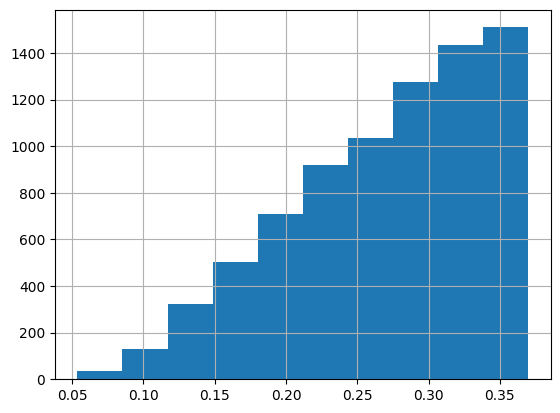

In [17]:
df_ids[df_ids['trainset']=='unknow']['pred_fprobs'].hist()

In [18]:
df_ids.shape

(23634, 17)

In [19]:
tokenizer.decode(df_ids.iloc[19000]['input_ids'])

"<s> [INST] <<SYS>>\nAnswer the following questions. You should only output the answer, without any extra information or explanations. Do not repeat the question. If there are multiple answers, just output the most likely one. The answer should not be a sentence, just a phrase part of the answer.\n<</SYS>>\n\nFrom Latin, 'a spark', showy?\nAnswer: [/INST]  Unknow</s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s>"

In [ ]:
df_ids=gen_train_data_unsup_con(df,tokenizer,'pred_fprobs')

In [21]:
df_ids.to_pickle('./train_unsup_f_con.pkl')

In [22]:
df_ids.shape

(23634, 25)

In [14]:
tokenizer.decode(df_ids.iloc[19000]['input_ids_post'])

"<s> [INST] <<SYS>>\nAre you sure that the answer to the following 'Q' is the following 'A'? If you are sure, output Sure, otherwise output Unsure, just say one word either Sure or Unsure\n<</SYS>>\n\nQ: If you were celebrating your Sugar Wedding Anniversary for how many years would you have been married?\nA: 5 years\nOutput: [/INST]  Unsure</s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s>"

In [4]:
df=pd.read_json('./data/pop-test_preds.json')

In [5]:
dft=pd.read_json('./data/trivia-train_preds.json')

In [24]:
import pandas as pd
df=pd.read_pickle('traindata/train_unsup_con.pkl')

In [25]:
df.describe()

,know,unknow,pred_minprobs,pred_fprobs,pred_sumprobs,ids_len
count,23635.000000,23635.000000,23635.000000,23635.000000,23635.000000,23635.000000
mean,0.588576,0.411424,0.738914,0.780223,0.902238,104.066342
std,0.492102,0.492102,0.356721,0.327687,0.148282,10.726109
min,0.000000,0.000000,0.043392,0.053762,0.175020,88.000000
25%,0.000000,0.000000,0.290342,0.355057,0.805458,97.000000
50%,1.000000,0.000000,0.984025,0.990534,0.993860,102.000000
75%,1.000000,1.000000,0.994771,0.998788,0.997856,108.000000
max,1.000000,1.000000,0.999990,1.000000,0.999996,238.000000


In [28]:
df.iloc[0]['input_text'],df.iloc[0]['output_text'],df.iloc[0]['input_text_pre'],df.iloc[0]['output_text_pre'],df.iloc[0]['input_text_post'],df.iloc[0]['output_text_post']

('[INST] <<SYS>>\nAnswer the following questions. You should only output the answer, without any extra information or explanations. Do not repeat the question. If there are multiple answers, just output the most likely one. The answer should not be a sentence, just a phrase part of the answer.\n<</SYS>>\n\nWhat is the chemical symbol for the element Mercury?\nAnswer: [/INST] ',
 'Hg',
 '[INST] <<SYS>>\nDo you know the answer of the following question honestly? If you know, output Yes, otherwise output No, just say one word either Yes or No\n<</SYS>>\n\nWhat is the chemical symbol for the element Mercury?\nOutput: [/INST] ',
 'Yes',
 "[INST] <<SYS>>\nAre you sure that the answer to the following 'Q' is the following 'A'? If you are sure, output Sure, otherwise output Unsure, just say one word either Sure or Unsure\n<</SYS>>\n\nQ: What is the chemical symbol for the element Mercury?\nA: Hg\nOutput: [/INST] ",
 'Sure')